First exercise: count the number of lines in Python for each file

In [8]:
import os
print os.getcwd()

/root/.ssh/Amadeus


1-st approach

In [1]:
import time
filename1='/media/sf_VM_share/bookings.csv'
filename2='/media/sf_VM_share/searches.csv'
def linecount_2(filename):
    n=10
    count = 0
    for line in open(filename).xreadlines(  ): count += 1
    return count

print("Starting")
start = time.clock(  )
print linecount_2(filename1)
stend = time.clock(  )
thetime = stend-start
print 'Time parsing', filename1, thetime

start = time.clock(  )
print linecount_2(filename2)
stend = time.clock(  )
thetime = stend-start
print 'Time parsing', filename2, thetime

Starting
10000011
Time parsing /media/sf_VM_share/bookings.csv 32.453576
20390199
Time parsing /media/sf_VM_share/searches.csv 29.887713


2-nd approach

In [2]:
import time
filename1='/media/sf_VM_share/bookings.csv'
filename2='/media/sf_VM_share/searches.csv'
def linecount_3(filename):
    count = 0
    thefile = open(filename)
    while 1:
        buffer = thefile.read(65536)
        if not buffer: break
        count += buffer.count('\n')
    return count
print("Starting")
start = time.clock(  )
print linecount_3(filename1)
stend = time.clock(  )
thetime = stend-start
print 'Time ', filename1, thetime

start = time.clock(  )
print linecount_3(filename2)
stend = time.clock(  )
thetime = stend-start
print 'Time ', filename2, thetime

Starting
10000011
Time  /media/sf_VM_share/bookings.csv 14.809917
20390198
Time  /media/sf_VM_share/searches.csv 13.111294


2-nd task

In [17]:
import numpy as np
import pandas as pd
import time
filename='/media/sf_VM_share/bookings.csv'
data= pd.read_csv(filename, sep='^', nrows=1)
#print map(str.strip, data.columns)
v=dict(fields= ['pax', 'arr_port'])
DD=pd.DataFrame()
print("Starting")
start = time.clock(  )
for chunk in pd.read_table(filename, sep="^", chunksize=100000, usecols=['arr_port','pax']):
    chunk.columns=map(str.strip, chunk.columns)
    DD=DD.append(chunk.reindex(columns = ['arr_port', 'pax'], copy = False), ignore_index =True)
    #print DD.head()
stend = time.clock(  )
thetime = stend-start
print 'Time ', filename1, thetime

D1= DD.groupby("arr_port")["pax"].sum().order(ascending=False)[:10]
print D1.head()
D2=pd.DataFrame(D1)
print pd.DataFrame({'arr_port'=D2.index})D2.head()
D2.index=map(str.strip,D2.index)
D3={'arr_port':D2.index,'pax':D2.pax}
df = pd.DataFrame(D3)

print df
D2=pd.DataFrame(index=map(str.strip,D1.index),data=map(int,D1))

df.to_csv('/media/sf_VM_share/dict2.csv', sep=',', index=False)
D2.to_json('/media/sf_VM_share/dict2.json')

Starting
Time  /media/sf_VM_share/bookings.csv 34.895087
arr_port
LHR         88809
MCO         70930
LAX         70530
LAS         69630
JFK         66270
Name: pax, dtype: float64
            pax
arr_port       
LHR       88809
MCO       70930
LAX       70530
LAS       69630
JFK       66270
    arr_port    pax
LHR      LHR  88809
MCO      MCO  70930
LAX      LAX  70530
LAS      LAS  69630
JFK      JFK  66270
CDG      CDG  64490
BKK      BKK  59460
MIA      MIA  58150
SFO      SFO  58000
DXB      DXB  55590


Find airports in Geobases

In [4]:
import sys
sys.path.append('/home/anna/.local/lib/python2.7/site-packages/python_geohash-0.8.5-py2.7-linux-x86_64.egg')
sys.path.append('/home/anna/.local/lib/python2.7/site-packages/Fuzzy-1.1-py2.7-linux-x86_64.egg')
sys.path.append('/home/anna/.local/lib/python2.7/site-packages/GeoBases-5.0.16-py2.7.egg')
sys.path.append('/home/anna/.local/lib/python2.7/site-packages/python_Levenshtein-0.12.0-py2.7-linux-x86_64.egg')
import GeoBases
from GeoBases import GeoBase
geo_o = GeoBase(data='ori_por', verbose=False)
res=pd.read_csv('/media/sf_VM_share/dict2.csv')
cities=[]
for x in res['arr_port']:
    cities.append(geo_o.get(str.strip(x), 'city_name_ascii'))

res['city']=pd.Series(cities, index=res.index)
res= res[['arr_port','pax','city']]
print res

  arr_port    pax           city
0      LHR  88809         London
1      MCO  70930        Orlando
2      LAX  70530    Los Angeles
3      LAS  69630      Las Vegas
4      JFK  66270  New York City
5      CDG  64490          Paris
6      BKK  59460        Bangkok
7      MIA  58150          Miami
8      SFO  58000  San Francisco
9      DXB  55590          Dubai


Plot history of searches for 'MAD', 'BCN', 'AGP'

              AGP    BCN    MAD
YearMonth                      
2013-01-01   9633  29469  24258
2013-02-01   8379  28329  22800
2013-03-01  10659  30552  24681
2013-04-01   8265  31236  25251
2013-05-01  10830  28728  26334
2013-06-01   7923  26505  22800
2013-07-01   8892  29241  22971
2013-08-01   7866  27075  21831
2013-09-01   8151  23427  21147
2013-10-01   6499  20276  22294
2013-11-01   6384  19824  20272
2013-12-01   3696  15400  14504


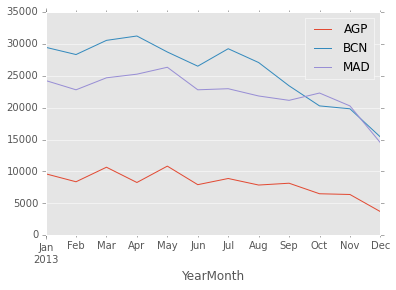

In [20]:
import pandas as pd
from pandas import *
filename='/media/sf_VM_share/searches.csv'
#filename='Documents/test_files/3.csv'
import matplotlib.pyplot as plt
import time
import matplotlib
from matplotlib.dates import DateFormatter, YearLocator, MonthLocator
plt.style.use('ggplot')
%matplotlib inline

def process_frame(df, dest):
    return  df.loc[df['Destination'].isin(dest)][['Destination','Date']]

reader = pd.read_csv(filename, chunksize=100000, sep="\^|\,", usecols=['Date',  'Destination'],
                     skipinitialspace=True, engine='python')

DD=pd.DataFrame()
dest=['MAD', 'BCN', 'AGP']

for df in reader:
    DD=DD.append(process_frame(df, dest), ignore_index =True)

end = time.clock(  )
DD['Date']=pd.to_datetime(DD['Date'],format='%Y-%m-%d')
DD['YearMonth'] = DD['Date'].map(lambda x: str('{year}-{month}'.format(year=x.year,month=x.month)))

DD['YearMonth']=pd.to_datetime(DD['YearMonth'],format='%Y-%m')
DD.index=DD['Destination']

ts1=DD.loc[DD['Destination']==dest[0]].groupby(['YearMonth'])['Destination'].agg('count')
ts2=DD.loc[DD['Destination']==dest[1]].groupby(['YearMonth'])['Destination'].agg('count')
ts3=DD.loc[DD['Destination']==dest[2]].groupby(['YearMonth'])['Destination'].agg('count')
data = {dest[0] : ts1,dest[1] : ts2, dest[2] : ts3}

df = pd.DataFrame(data)
print df
df.plot()


Data merging using HDFS

In [2]:
import time
import gc
import numpy as np
import pandas as pd
from pandas.util.testing import assert_frame_equal

filename='/media/sf_VM_share/searches.csv'
S = pd.HDFStore('storeS.h5', 'w')

# Functions to control date format in input files
def check_dates(df, m):
    #df=df.apply(lambda x: x.str.strip())
    df.index=pd.to_datetime(df.index,format='%Y-%m-%d')
    return df.loc[map(lambda x: x==m,map(int,df.index.month))]

def check_dates_neg(df, m):
    df.index=pd.to_datetime(df.index,format='%Y-%m-%d')
    df=df.apply(lambda x: x.str.strip())#if isinstance(x, str) else x)
    return df.loc[map(lambda x: x!=m,map(int,df.index.month))]

# Storing data from seaches to HDFS month by month
#Every object in HDFS "storeS.h5" contains only necessary data for merging 
#(origin and destination with correspondent date) 
#with the appropriate name of object e.g. month01 -data for Jan 2013
#Such type of storing allows to access the data for different periods(months) for merging
#searches with bookings
#that as assumed were at the same date 
#process_dfS add the data to HDFS recursively
def process_dfS(df):
    DD=pd.DataFrame()
    m= int(pd.to_datetime(df.index,format='%Y-%m-%d').month[1])
    d1=check_dates(df, m)
    DD=d1
    #print m
    S.append(str("month"+str(m)), DD, expectedrows=20390198)
    if d1.shape!=df.shape:
        df= check_dates_neg(df,m) 
        if not df.empty:
            df= check_dates_neg(df,m)
            process_dfS(df)
    
start = time.clock(  )
print 'Fill HDFS with seaches'
#Create TextFileReader for iterable reading
#The file searches.csv is read chunk by chunk beacause of the size
#It requires a lot of RAM to load hole file in the memory 
reader = pd.read_csv(filename, sep="\^|\,", chunksize=10000
                     , usecols=['Date', 'Time','Origin', 'Destination'],
                     skipinitialspace=True
                     ,engine='python')

gc.collect()

#processing file chunk by chunk; apply process_dfS
for df in reader:
    df=df.set_index(df.columns.values[0])
    process_dfS(df)
    gc.collect()

diff=time.clock(  )-start
print 'Time', diff
print 'Fill HDFS with bookings'
filename='/media/sf_VM_share/bookings.csv'

# create another HDFStore for bookings file to store data in the same format as 
#storeS.h5 for searches.csv file
B = pd.HDFStore('storeB.h5', 'w')

# Storing data from bookings.csv to HDFS month by month
# "storeB.h5" should contain the objects with the same key values as "storeS.h5"
#process_dfB add the data to HDFS recursively
def process_dfB(df):
    #print 'start processing'
    DD=pd.DataFrame()
    m= int(pd.to_datetime(df.index,format='%Y-%m-%d').month[1])
    d1=check_dates(df, m)
    DD=d1
    B.append(str("month"+str(m)), DD, expectedrows=10000011)
    if d1.shape!=df.shape:
        df= check_dates_neg(df,m)
        if not df.empty:
            df= check_dates_neg(df,m)
            process_dfB(df)
#Reading the data from bookings.csv chunk by chunk and adding it to the "storeB.h5"   
reader = pd.read_csv(filename, sep="^", chunksize=10000
                     , usecols=[0,9, 12], error_bad_lines=False,
                     skipinitialspace=True
                    # ,engine='python'
                    )
gc.collect()

for df in reader:
    df['Time']=map(lambda x: x.split(' ')[1],map(str.strip,df[df.columns[0]]))
    df[df.columns[0]]=map(lambda x: x.split(' ')[0],map(str.strip,df[df.columns[0]]))
    #print df['Time']
    pd.to_datetime(df[df.columns[0]],format='%Y-%m-%d')
    df=df.set_index(df.columns.values[0])
    process_dfB(df)
    gc.collect() 
    
diff1=time.clock(  )-start-diff
print 'Time', diff1
diff=diff+diff1
print 'Merging HDFS'

#Create the HDFS, which contains only the data of date, origin and destination 
#that present in the bookings and searches
# using matching keys from constructed HDFS

M = pd.HDFStore('storeM.h5')

#function to merge of two dataFrames
def merge_a_b(a,b):
    return pd.merge(a, b, on=['index','Origin', 'Destination'], how='inner').drop_duplicates(['index','Origin', 'Destination'])

K=B.keys()

for x in K:
    d1=S.get(x)
    d2=B.get(x)
    d1 = d1.reset_index()
    d2.columns = ['Origin','Destination','Time'] # set names
    d2 = d2.reset_index()
    M.append('merged', merge_a_b(d1,d2), expectedrows=10000011)
    gc.collect()

#Adding the flag to searches.csv
#If the data in searches match the data (line) in the storeM.h5 the flag 'find_in bookings' will be 1
#Otherwise in will be 0

#Verify of matching
def find_rows(df, DD):
    return df['find'].isin(DD['find']).astype(int)

#Function to concat olumns in the dataFrame
def concat(*args):
    strs = [str(arg) for arg in args if not pd.isnull(arg)]
    return ','.join(strs) if strs else np.nan
    
np_concat = np.vectorize(concat)

diff1=time.clock(  )-start-diff
print 'Time', diff1
diff=diff+diff1
print 'Produce output'

R = pd.HDFStore('storeR.h5')
DD= M.get('merged')
DD = DD.set_index(['index'])
DD.sort_index(inplace=True)
DD['Date']=DD.index
DD['Date']=map(lambda x: x.split(' ')[0],map(str,DD['Date']))
DD['find']=np_concat(DD['Date'], DD['Origin'], DD['Destination'])

filename='/media/sf_VM_share/searches.csv'
reader = pd.read_csv(filename, sep="\^|\,", chunksize=10000
                     #, usecols=['Date', 'Time','Origin', 'Destination'],
                     ,skipinitialspace=True
                     ,engine='python')
# Create the column with concated values of the columns that should match in the searches
# and storeM.h5
#Verify the presence of lines in file searches.csv in HDFS with the data of required values
#Store flag in the column 'find_in bookings'
#The column 'find' can be deleted or replaced with the values of 'find_in bookings' if neccessary
#write data to the file out.csv
for df in reader:
    df=df.set_index(df.columns.values[0])
    df['Date']=df.index
    df['find']=np_concat(df['Date'], df['Origin'], df['Destination'])
    df['find_in bookings']=find_rows(df, DD)
    with open('/media/sf_VM_share/result.csv', 'a') as f:
        df.to_csv(f, header=True)
    gc.collect()
    
dtime=time.clock(  )-start    
print 'Time parsing',dtime
f.close()

Fill HDFS with seaches
Time 632.193836
Fill HDFS with bookings
Time 474.756477
Merging HDFS
Time 25.555384
Produce output
Time parsing 1963.776152


In [ ]:
import pandas as pd
import numpy as np
import gc
import time

filename='/media/sf_VM_share/bookings.csv'

def concat(*args):
    strs = [str(arg) for arg in args if not pd.isnull(arg)]
    return ','.join(strs) if strs else np.nan
    
np_concat = np.vectorize(concat)
        
def find_rows(df, DD):
    return df.index.isin(DD.index).astype(int)

start = time.clock(  )
reader = pd.read_csv(filename, sep="^",  usecols=[0,9, 12], error_bad_lines=False,
                     skipinitialspace=True
                    # ,engine='python'
                    )

reader['find']=np_concat(map(lambda x: x.split(' ')[0],map(str.strip,reader[reader.columns[0]])), 
                         map(str.strip,reader[reader.columns[1]]), map(str.strip,reader[reader.columns[2]]))
reader.index=reader['find']
filename='/media/sf_VM_share/searches.csv'
searches = pd.read_csv(filename, sep="\^|\,", chunksize=10000,
                     skipinitialspace=True
                     ,engine='python')
out = open('out.csv', 'w')
for df in searches:
    df['find']=np_concat(map(lambda x: x.split(' ')[0],map(str.strip,df['Date'])), 
                         map(str.strip,df['Origin']), map(str.strip,df['Destination']))
    df.index=df['find']
    df['find_in bookings']=find_rows(df, reader)
    with open('/media/sf_VM_share/out.csv', 'a') as f:
        df.to_csv(f, header=True)
    gc.collect()
    

dtime=time.clock(  )-start
print 'Time parsing',dtime